In [53]:
import pandas as pd
import json
import numpy as np
import plotly.express as px

df = pd.read_csv("data/theme_popularite.csv")
df

,Unnamed: 0,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995
1,1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
2,3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995
3,5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,1995
4,8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,International action superstar Jean Claude Van...,5.231580,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,5.5,174.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,45250,12000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",ta,Corrupt police and politicians target a comput...,1.323587,2007-06-14,19000000.0,185.0,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}, {'iso_6...",Released,NaN,Sivaji: The Boss,6.9,25.0,2007
5377,45399,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",ru,NaN,0.201582,2014-06-05,3.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,All at Once,6.0,4.0,2014
5378,45409,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"The sea, August, interesting and simple people...",0.903061,2006-11-23,1328612.0,100.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Savages,5.8,6.0,2006
5379,45412,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,2010-09-30,1268793.0,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Pro Lyuboff,4.0,3.0,2010


In [54]:
def convert_genres(s):
	l = json.loads(s.replace('\'', '"'))
	ret = []
	for d in l:
		ret.append(d['name'])
	return ret

In [55]:
df.genres = df.genres.apply(convert_genres)
df_exploded = df.explode('genres')
df_exploded

,Unnamed: 0,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,0,30000000,Animation,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995
0,0,30000000,Comedy,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995
0,0,30000000,Family,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995
1,1,65000000,Adventure,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
1,1,65000000,Fantasy,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5379,45412,2000000,Drama,en,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,2010-09-30,1268793.0,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Pro Lyuboff,4.0,3.0,2010
5380,45422,5000000,Action,ru,Failing to complete an important assignment wi...,0.039793,2007-09-06,1413000.0,91.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Antidur,1.0,1.0,2007
5380,45422,5000000,Comedy,ru,Failing to complete an important assignment wi...,0.039793,2007-09-06,1413000.0,91.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Antidur,1.0,1.0,2007
5380,45422,5000000,Crime,ru,Failing to complete an important assignment wi...,0.039793,2007-09-06,1413000.0,91.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Antidur,1.0,1.0,2007


In [129]:
df_year = df_exploded.groupby(["release_year","genres"], as_index=False).agg({"budget":"sum", "revenue":"sum", "popularity":"mean", "vote_average":"mean", "vote_count":"mean", "title":"count"})
df_year = df_year.set_index('release_year', append=True).swaplevel(1,0).sort_index(level=0)
df_year

genres      budget       revenue  popularity  \
release_year                                                               
1915         0               Drama      117311  1.113736e+07    2.896806   
             1             History      100000  1.100000e+07    5.113205   
             2                 War      100000  1.100000e+07    5.113205   
1916         3              Action      200000  8.000000e+06    0.917777   
             4           Adventure      200000  8.000000e+06    0.917777   
...                            ...         ...           ...         ...   
2017         1208          Romance   347845300  1.685507e+09   50.033256   
             1209  Science Fiction  1422271676  3.326604e+09   58.475621   
             1210         Thriller  1259400000  4.184887e+09   34.011323   
             1211              War   362745300  1.132757e+09   36.821993   
             1212          Western    70500000  9.644294e+07   43.582051   

                   vote_average   vote_count  title  
release_year                                         
1915         0         5.600000    60.000000      2  
             1         6.400000   109.000000      1  
             2         6.400000   109.000000      1  
1916         3         6.000000     7.000000      1  
             4         6.000000     7.000000      1  
...                         ...          ...    ...  
2017         1208      6.562500  1104.125000      8  
             1209      6.357143  1925.000000     14  
             1210      6.208696  1249.086957     23  
             1211      6.866667   778.666667      6  
             1212      5.750000   483.500000      2  

[1213 rows x 7 columns]

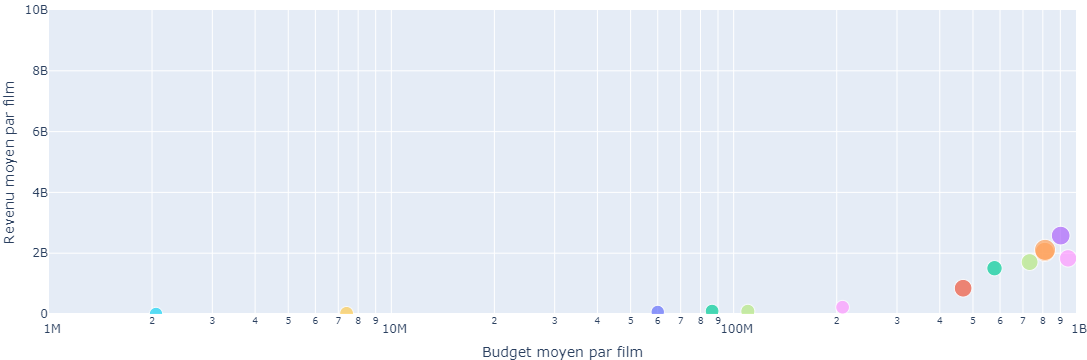

AttributeError: module 'plotly.express' has no attribute 'autoscale'

In [133]:
xaxis_type = "log"
size = df_year.loc[1999]['title'].to_numpy()
nb_films = size.sum()
s = [((s/nb_films) * 100)*2 + 10 for s in size]

dfg = df_year.loc[1999]
fig = px.scatter(dfg, x = "budget", y = "revenue", 
                 size = s, 
                 color = "genres",
                 hover_name="genres")
fig.update_layout(
         xaxis = dict(title='Budget moyen par film',
                      type= 'linear' if xaxis_type == 'Linéaire' else 'log',
                      range=(0,3000000000) if xaxis_type == 'Linéaire' 
                                      else (np.log10(1000000), np.log10(1000000000)) 
                     ),
         yaxis = dict(title="Revenu moyen par film", range=(0,10000000000)),
         margin={'l': 40, 'b': 30, 't': 10, 'r': 0},
         hovermode='closest',
         showlegend=False,
     )
fig.show()